<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Project%201_Plot%20the%20graph%20of%20the%20DT%20%20fitting%20model%20(10082023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Plot the learning curve of the DT model**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

In [ ]:
# Load data
dataset = pd.read_csv("dataset.csv")
y = dataset['Class'].values
X = dataset.drop(['Class'],axis=1).values

In [ ]:
# Oversample using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
# Initialize the classifier
clf = DecisionTreeClassifier()

In [ ]:
# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(estimator=clf,
                                                        X=X_train,
                                                        y=y_train,
                                                        cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='accuracy')

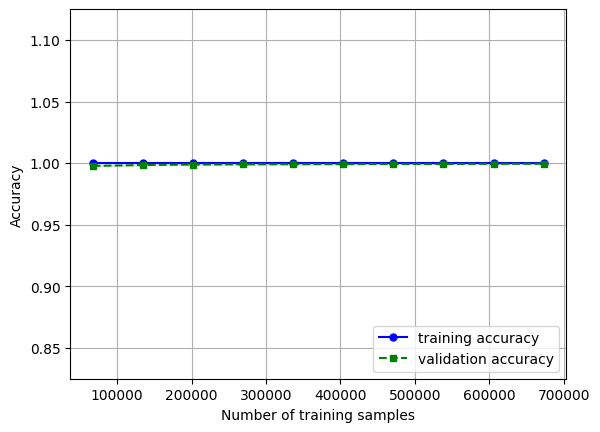

In [ ]:
# Plot the learning curve
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.825, 1.125])
plt.show()

In [2]:
!pip install matplotlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.multiclass import unique_labels

In [4]:
dataset = pd.read_csv("dataset.csv")
dataset.shape
dataset.isnull().sum()

dataset.info()

dataset["Class"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312106 entries, 0 to 312105
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Event           312106 non-null  int64  
 1   Time            312106 non-null  float64
 2   S_Node          312106 non-null  int64  
 3   Node_id         312106 non-null  int64  
 4   Rest_Energy     312106 non-null  float64
 5   Trace_Level     312106 non-null  int64  
 6   Mac_Type_Pckt   312106 non-null  int64  
 7   Source_IP_Port  312106 non-null  float64
 8   Des_IP_Port     312106 non-null  float64
 9   Packet_Size     312106 non-null  int64  
 10  TTL             312106 non-null  int64  
 11  Hop_Count       312106 non-null  int64  
 12  Broadcast_ID    312106 non-null  int64  
 13  Dest_Node_Num   312106 non-null  int64  
 14  Dest_Seq_Num    312106 non-null  int64  
 15  Src_Node_ID     312106 non-null  int64  
 16  Src_Seq_Num     312106 non-null  int64  
 17  Class     

array([0, 1, 2, 3])

In [5]:
#Installing imblearn
!pip install -U imbalanced-learn
!pip install imbalanced-learn

# check version number
import imblearn
print(imblearn.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
0.11.0


In [6]:
# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X)
print(y)

[[1.00000000e+00 1.00000000e-01 7.90000000e+01 ... 0.00000000e+00
  7.90000000e+01 4.00000000e+00]
 [2.00000000e+00 1.00963167e-01 7.80000000e+01 ... 0.00000000e+00
  7.90000000e+01 4.00000000e+00]
 [2.00000000e+00 1.00963500e-01 7.60000000e+01 ... 0.00000000e+00
  7.90000000e+01 4.00000000e+00]
 ...
 [4.00000000e+00 6.57891729e+02 1.40000000e+02 ... 1.60000000e+01
  1.40000000e+02 7.60000000e+01]
 [4.00000000e+00 6.58574656e+02 1.40000000e+02 ... 1.60000000e+01
  1.40000000e+02 8.00000000e+01]
 [4.00000000e+00 6.79054956e+02 1.40000000e+02 ... 1.60000000e+01
  1.40000000e+02 9.00000000e+01]]
[0 0 0 ... 1 1 1]


In [7]:
import collections as c
counter = c.Counter(y)
print(counter)

Counter({0: 262851, 3: 29844, 1: 11766, 2: 7645})


In [8]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = c.Counter(y)
print(counter)

Counter({0: 262851, 1: 262851, 2: 262851, 3: 262851})


In [11]:
from sklearn.model_selection import train_test_split
##X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=101)

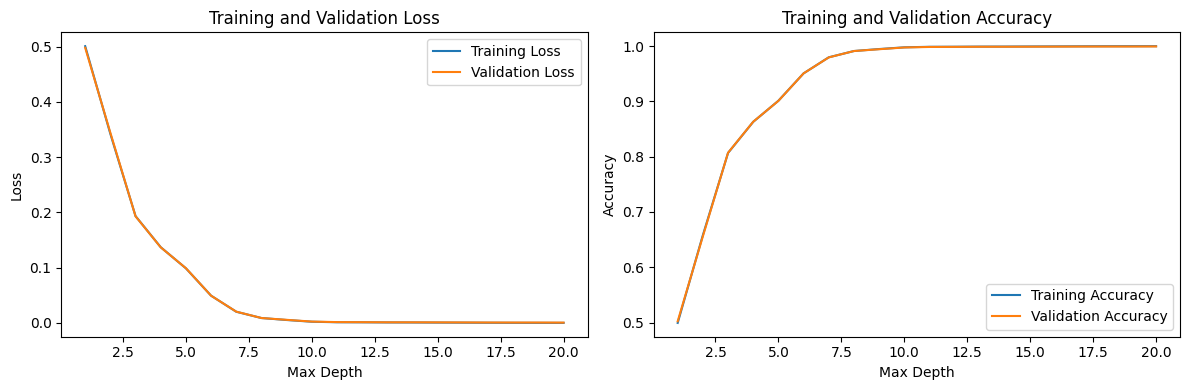

In [12]:
# Train multiple Decision Trees with varying depths
max_depths = range(1, 21)
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)

    # Training predictions
    y_train_pred = clf.predict(X_train)
    train_loss = np.mean(y_train_pred != y_train)
    train_losses.append(train_loss)

    train_accuracy = np.mean(y_train_pred == y_train)
    train_accuracies.append(train_accuracy)

    # Validation predictions
    y_val_pred = clf.predict(X_val)
    val_loss = np.mean(y_val_pred != y_val)
    val_losses.append(val_loss)

    val_accuracy = np.mean(y_val_pred == y_val)
    val_accuracies.append(val_accuracy)

# Plotting
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(max_depths, train_losses, label='Training Loss')
plt.plot(max_depths, val_losses, label='Validation Loss')
plt.xlabel('Max Depth')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, val_accuracies, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

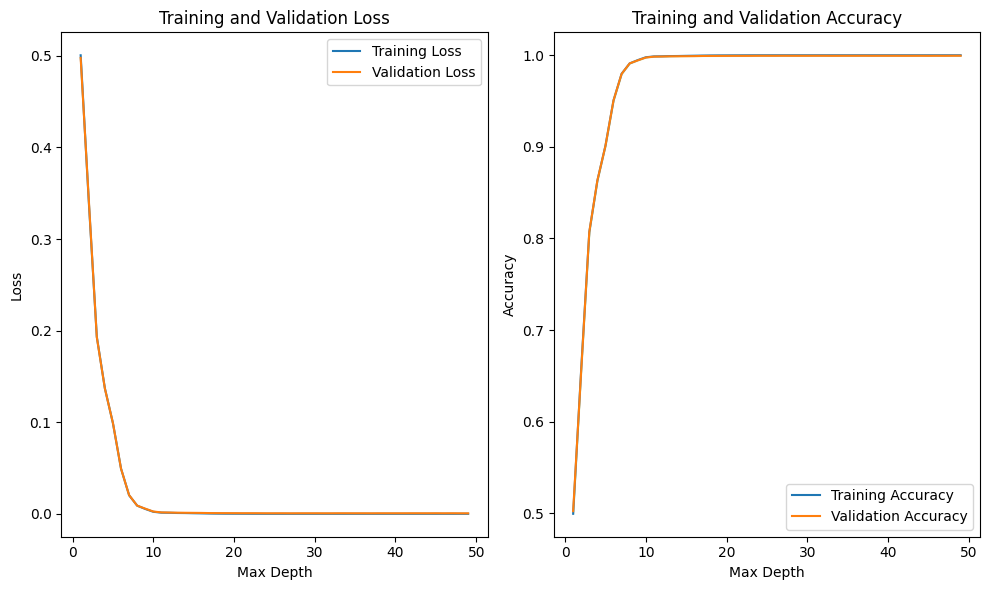

In [14]:
# Train multiple Decision Trees with varying depths
max_depths = range(1, 50)
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)

    # Training predictions
    y_train_pred = clf.predict(X_train)
    train_loss = np.mean(y_train_pred != y_train)
    train_losses.append(train_loss)

    train_accuracy = np.mean(y_train_pred == y_train)
    train_accuracies.append(train_accuracy)

    # Validation predictions
    y_val_pred = clf.predict(X_val)
    val_loss = np.mean(y_val_pred != y_val)
    val_losses.append(val_loss)

    val_accuracy = np.mean(y_val_pred == y_val)
    val_accuracies.append(val_accuracy)

# Plotting
plt.figure(figsize=(10, 6))

# Combined plot
plt.subplot(1, 2, 1)
plt.plot(max_depths, train_losses, label='Training Loss')
plt.plot(max_depths, val_losses, label='Validation Loss')
plt.fill_between(max_depths, train_losses, val_losses, color='skyblue', alpha=0.2)  # Filling area between lines
plt.xlabel('Max Depth')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, val_accuracies, label='Validation Accuracy')
plt.fill_between(max_depths, train_accuracies, val_accuracies, color='lightgreen', alpha=0.2)  # Filling area between lines
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()